In [ ]:
pip install pandas

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [242]:
def isbn10_to_isbn13(isbn10):
    if len(isbn10) < 10:
        isbn10 = isbn10.zfill(10)  # Pad with leading zeros if necessary
    
    # Add prefix '978' to convert ISBN-10 to ISBN-13
    isbn13_prefix = '978' + isbn10[:-1]
    
    # Calculate the check digit for ISBN-13
    check_sum = sum((1 if i % 2 == 0 else 3) * int(digit) for i, digit in enumerate(isbn13_prefix))
    check_digit = (10 - (check_sum % 10)) % 10
    
    return isbn13_prefix + str(check_digit)



In [ ]:
#books data frame that will be worked with is booksdf
books = "/Users/oreoluwaala/Documents/Book Recommendation Project/rawdata/books.csv" 
ratings = "/Users/oreoluwaala/Documents/Book Recommendation Project/rawdata/ratings.csv" 
tbr = "/Users/oreoluwaala/Documents/Book Recommendation Project/rawdata/to_read.csv" 

#fill empty isbn values with integer representation
books_dataframe = pd.read_csv(books)
books_dataframe['isbn'] = books_dataframe['isbn'].fillna('')

#booksdf creation
booksdf = books_dataframe[["title", "authors", "average_rating", "book_id","original_publication_year", "genres", "pages"]]

#change year column to basic integer
booksdf['original_publication_year'] = booksdf['original_publication_year'].fillna(-1)
booksdf["original_publication_year"] = booksdf["original_publication_year"].astype(int)

#change isbn10 to 13 with the function above
booksdf["isbn13"] = books_dataframe["isbn"].apply(isbn10_to_isbn13)

#add isbn13 to the dataframe
booksdf = booksdf[["title", "authors", "book_id","isbn13", "average_rating","original_publication_year", "genres", "pages"]]

#ratings dataframe
ratingsdf = pd.read_csv(ratings)

#to be read dataframe
tbrdf = pd.read_csv(tbr)



In [244]:
booksdf.head()

,title,authors,book_id,isbn13,average_rating,original_publication_year,genres,pages
0,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],1,9780439023481,4.34,2008,"['young-adult', 'fiction', 'fantasy', 'science...",374.0
1,Harry Potter and the Sorcerer's Stone (Harry P...,"['J.K. Rowling', 'Mary GrandPré']",2,9780439554930,4.44,1997,"['fantasy', 'fiction', 'young-adult', 'classics']",309.0
2,"Twilight (Twilight, #1)",['Stephenie Meyer'],3,9780316015844,3.57,2005,"['young-adult', 'fantasy', 'romance', 'fiction...",501.0
3,To Kill a Mockingbird,['Harper Lee'],4,9780061120084,4.25,1960,"['classics', 'fiction', 'historical-fiction', ...",324.0
4,The Great Gatsby,['F. Scott Fitzgerald'],5,9780743273565,3.89,1925,"['classics', 'fiction', 'historical-fiction', ...",200.0


In [245]:
ratingsdf.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [246]:
tbrdf.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


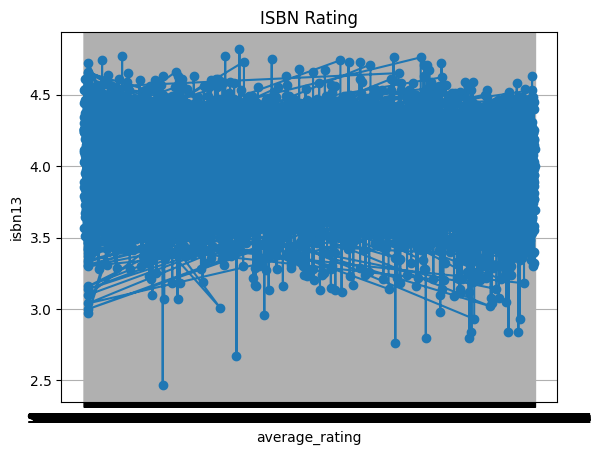

In [247]:
plt.plot(booksdf['isbn13'], booksdf['average_rating'], marker='o', linestyle='-')
plt.title('ISBN Rating')
plt.xlabel('average_rating')
plt.ylabel('isbn13')
plt.grid(True)
plt.show()